# Simulation Zentralität und Prestige

In [158]:
# notwendige Importe
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Sterngraphen zum testen der Funktionen

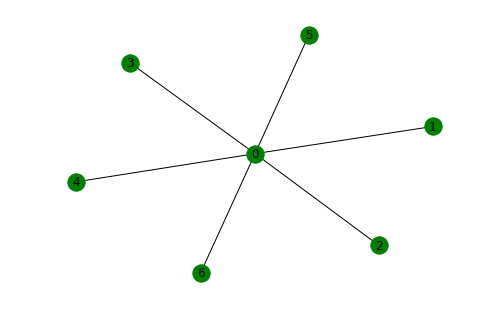

In [159]:
# Einfacher Sterngaph
G = nx.star_graph(6)
   
# Graph anzeigen
nx.draw(G, node_color = 'green', with_labels = True);

## Zentralität

### Degree 

In [160]:
# Akteurs Degree
def degree_list(graph):
    C_d = dict()
    for i in graph.nodes():
        d_i = graph.degree(i)
        C_d.update({i: d_i})
    return C_d
    
print("Akteurs Degree:", degree_list(G))

# Std. Degree
def standarized_degree_list(graph):
    std_C_d = dict()
    for i in graph.nodes():
        std_d_i = round((graph.degree(i) / (len(graph.nodes()) - 1)), 5)
        std_C_d.update({i: std_d_i})
    return std_C_d

print("Standardisierte Akteurs Degree:", standarized_degree_list(G))

Akteurs Degree: {0: 6, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}
Standardisierte Akteurs Degree: {0: 1.0, 1: 0.16667, 2: 0.16667, 3: 0.16667, 4: 0.16667, 5: 0.16667, 6: 0.16667}


In [161]:
# Gruppenbezogenes Degree
g = len(G.nodes())

def group_degree(graph, g):
    C_d = degree_list(graph)
    max_deg = max(C_d.values())
    sum_deg = 0
    for node, val in C_d.items():
        value = max_deg - val
        sum_deg += value
    C_D = round((sum_deg/((g-1)*(g-2))),5)
    return C_D

print("Gruppen Degree:", group_degree(G, g))

Gruppen Degree: 1.0


### Closeness

In [162]:
# Akteur Closeness
def closeness(graph):
    C_c = dict()
    for i in graph.nodes():
        length = nx.single_source_shortest_path_length(graph, i)
        sum_length = sum(length.values())
        if sum_length != 0:
            C_c_i = round(((sum_length)**(-1)), 5)
        else:
            C_c_i = 0
        C_c.update({i:C_c_i})
    return C_c

print("Akteur Closeness:", closeness(G))

# Std. Closeness
def standardized_closeness(graph, g):
    std_c_c = dict()
    C_c = closeness(graph)
    for node, val in C_c.items():
        std_c_c_i = round(((g-1)*val), 5)
        std_c_c.update({node:std_c_c_i})
    return std_c_c
    
print("Standardisierte Akteur Closeness:", standardized_closeness(G, g))

Akteur Closeness: {0: 0.16667, 1: 0.09091, 2: 0.09091, 3: 0.09091, 4: 0.09091, 5: 0.09091, 6: 0.09091}
Standardisierte Akteur Closeness: {0: 1.00002, 1: 0.54546, 2: 0.54546, 3: 0.54546, 4: 0.54546, 5: 0.54546, 6: 0.54546}


In [163]:
# Gruppenbezogene Closeness
def group_closeness(graph, g):
    max_clos = max(standardized_closeness(graph, g).values())
    std_c_c = standardized_closeness(graph, g)
    sum_clos = 0
    for i in graph.nodes():
        val = max_clos - std_c_c[i]
        sum_clos += val
    C_C = round((sum_clos/(((g-1)*(g-2))/(2*g-3))),5)
    return C_C

print("Gruppen Closeness:", group_closeness(G, g))

Gruppen Closeness: 1.00003


### Betweenness

In [164]:
# Std. Betweeness
def standardized_betweeness(graph, g):
    # Akteur Betweeness (hier direkt aus Package genommen da gleich berechnet)
    between = nx.betweenness_centrality(graph)
    std_c_b = dict()
    for i in graph.nodes(): 
        std_c_b_i = round((between[i]/(((g-1)*(g-2))/2)), 5)
        std_c_b.update({i:std_c_b_i})
    return std_c_b

print("Standardisierte Akteur Betweenness:", standardized_betweeness(G, g))

Standardisierte Akteur Betweenness: {0: 0.06667, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}


In [165]:
# Gruppenbezogene Betweeness
def group_betweenness(graph, g):
    std_between = standardized_betweeness(graph, g)
    max_between = max(standardized_betweeness(graph, g).values())
    sum_bet = 0
    for i in graph.nodes():
        val = max_between - std_between[i]
        sum_bet += val
    C_B = round(((sum_bet)/(g-1)), 5)
    return C_B

print("Gruppen Betweenness:", group_betweenness(G, g))

Gruppen Betweenness: 0.06667


## Prestige
### Gerichtetes Netzwerk erstellen (ähnlich Sterngraph für Kontrolle)

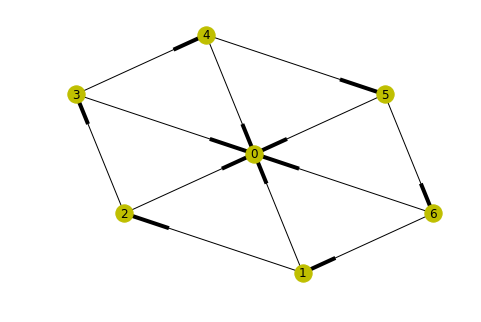

In [166]:
graph = {0: [],
         1: [0, 2],
         2: [0, 3],
         3: [0, 4],
         4: [0, 5],
         5: [0, 6],
         6: [0, 1]}


DG = nx.DiGraph(graph)

nx.draw_spectral(DG, node_color='y', with_labels=True)

# g initialisieren (Anzahl der vorhandenen Knoten)
dg = len(DG.nodes())

### Degree

In [167]:
def prestige_degree(diGraph, dg):
    prest = dict()
    for i in diGraph.nodes():
        deg = round((diGraph.in_degree[i]/(dg-1)),5)
        prest.update({i : deg})
    return prest

print("Prestige Degree:", prestige_degree(DG, dg))

Prestige Degree: {0: 1.0, 1: 0.16667, 2: 0.16667, 3: 0.16667, 4: 0.16667, 5: 0.16667, 6: 0.16667}


### Nachbarschaft

In [168]:
## Vorbereitung um Nachbarschaft zu berechnen
# I
def prestige_I(diGraph):
    neigh = dict()
    for i in diGraph.nodes():
        I = [n for n in diGraph.neighbors(i)]
        neigh.update({i: I})

    influence = dict()
    for i in diGraph.nodes():
        can_reach_i = list()
        for node, val in neigh.items():
            if i in val:
                can_reach_i.append(node)
        influence.update({i: len(can_reach_i)})
    return influence


# Durchschnittliche Akteursdistanz
def mean_actor_distance(diGraph):
    neigh = dict()
    for i in diGraph.nodes():
        I = [n for n in diGraph.neighbors(i)]
        neigh.update({i: I})

    influence = dict()
    for i in diGraph.nodes():
        can_reach_i = list()
        for node, val in neigh.items():
            if i in val:
                can_reach_i.append(node)
        influence.update({i: can_reach_i})

    dist = dict()
    for node, val in influence.items():
        sum_distance = 0
        if len(val) > 0:
            for n in val:
                length = nx.shortest_path_length(diGraph, source=n, target=node)
                sum_distance += length
                mean_val = round((sum_distance / len(val)), 5)
        else:
            mean_val = 0
        dist.update({node: mean_val})
    return dist

## Akteur Nachbarschaft
def nachbarschaft(diGraph, dg):
    I = prestige_I(diGraph)
    mean_dis = mean_actor_distance(diGraph)
    P_P = dict()
    for node, val in I.items():
        for n2, val2 in mean_dis.items():
            if node is n2:
                if val2 != 0:
                    P_p = round(((val / (dg - 1)) / val2), 5)
                else:
                    P_p = 0
                P_P.update({node: P_p})
    return P_P
            
print("I:", prestige_I(DG))
print("Durschnittliche Distanz von Akteur i:", mean_actor_distance(DG))
print("Nachbarschafts Prestige:", nachbarschaft(DG, dg))

I: {0: 6, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}
Durschnittliche Distanz von Akteur i: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}
Nachbarschafts Prestige: {0: 1.0, 1: 0.16667, 2: 0.16667, 3: 0.16667, 4: 0.16667, 5: 0.16667, 6: 0.16667}


In [169]:
# Gruppenbezogne Nachbarschaft
def group_nachbarschaft(diGraph, dg):
    P_P = nachbarschaft(diGraph, dg)
    group_p = 0
    for node, val in P_P.items():
        mean_p = val/dg
        group_p += mean_p
    return group_p

print("Gruppen Nachbarschafts Prestige:", group_nachbarschaft(DG, dg))

Gruppen Nachbarschafts Prestige: 0.28571714285714284


## Zentralität für gerichtete Netzwerke 
    

In [170]:
# Degree
def degree_digraph(diGraph, dg):
    degree_di = dict()
    for i in diGraph.nodes():
        outdegree = diGraph.out_degree[i]
        degree_i = round((outdegree/(dg-1)), 5)
        degree_di.update({i: degree_i})
    return degree_di
        
print("Degree gerichteter Graph:", degree_digraph(DG, dg))

# Gruppenbezogenes Degree
def group_degree_digraph(diGraph, dg):
    C_d = degree_digraph(diGraph, dg)
    max_deg = max(C_d.values())
    sum_deg = 0
    for node, val in C_d.items():
        value = max_deg - val
        sum_deg += value
    C_D = round((sum_deg/((dg-1)**2)),5)
    return C_D

print("Gruppendegree gerichteter Graph:", group_degree_digraph(DG, dg))        

Degree gerichteter Graph: {0: 0.0, 1: 0.33333, 2: 0.33333, 3: 0.33333, 4: 0.33333, 5: 0.33333, 6: 0.33333}
Gruppendegree gerichteter Graph: 0.00926


In [16]:
'''# Closeness (MUSS AUSGEKLAMMERT WERDEN)
def closeness_digraph(diGraph, dg):
    closesness_di = dict()
    for i in diGraph.nodes():
        di = nx.single_source_shortest_path_length(diGraph, i)
        sum_di = sum(di.values())
        if sum_di != 0:
            c_di = round(((dg-1)/sum_di), 5)
        else:
            c_di = 0
        closesness_di.update({i:c_di})
    return closesness_di

print("Closeness gerichteter Graph:", closeness_digraph(DG, dg))'''

'# Closeness (MUSS AUSGEKLAMMERT WERDEN)\ndef closeness_digraph(diGraph, dg):\n    closesness_di = dict()\n    for i in diGraph.nodes():\n        di = nx.single_source_shortest_path_length(diGraph, i)\n        sum_di = sum(di.values())\n        if sum_di != 0:\n            c_di = round(((dg-1)/sum_di), 5)\n        else:\n            c_di = 0\n        closesness_di.update({i:c_di})\n    return closesness_di\n\nprint("Closeness gerichteter Graph:", closeness_digraph(DG, dg))'

In [171]:
# Vorarbeit Std. Closeness gerichteter Graph

# Code gefunden auf https://www.geeksforgeeks.org/find-all-reachable-nodes-from-every-node-present-in-a-given-set/
# er wurde lediglich für die hier genutzen Zwecke angepasst
from collections import deque
 
def addEdge(edgelist):
    global visited, adj
    for edge in edgelist:
        if len(edge) == 2:
            v = edge[0]
            w = edge[1]
            adj[v].append(w)
        else:
            print('Input is not an edgelist!')
 
def BFS(componentNum, src):
    global visited, adj
     
    # Mark all the vertices as not visited
    # Create a queue for BFS
    queue = deque()
    queue.append(src)
    # Assign Component Number
    visited[src] = 1
    # Vector to store all the reachable
    # nodes from 'src'
    reachableNodes = []
    while (len(queue) > 0):
        # Dequeue a vertex from queue
        u = queue.popleft()
        reachableNodes.append(u)
        # Get all adjacent vertices of the dequeued
        # vertex u. If a adjacent has not been visited,
        # then mark it visited nd enqueue it
        for itr in adj[u]:
            if (visited[itr] == 0):
                # Assign Component Number to all the
                # reachable nodes
                visited[itr] = 1
                queue.append(itr)
 
    return reachableNodes
 

def findReachableNodes(arr, n):
    global V, adj, visited
    reachable = dict()
    # Map to store list of reachable Nodes for a
    # given node.
    a = []
    # Initialize component Number with 0
    componentNum = 0
    # For each node in arr[] find reachable
    # Nodes
    for i in range(n):
        u = arr[i]
        # Visit all the nodes of the component
        if (visited[u] == 0):
            componentNum += 1
            # Store the reachable Nodes corresponding
            # to the node 'i'
            a = BFS(componentNum, u)
        reachable.update({u:a})
        
    return(reachable)

In [172]:
# Standartisierte Closeness C*_C

# Initialisieren
V = len(DG.nodes())
adj = [[] for i in range(V + 1)]
visited = [0 for i in range(V + 1)]
addEdge(DG.edges())
arr = list(DG.nodes())
n = len(arr)

# Berechnen
J = findReachableNodes(arr, n)

std_close_di = dict()
for i in DG.nodes():
    di = nx.single_source_shortest_path_length(DG, i)
    sum_di = sum(di.values())
    j = list(J.values())
    j_i = len(j[i])
    if sum_di != 0:
        std_c = round(((j_i/(dg-1))/((sum_di)/j_i)),5)
    else:
        std_c = 0
    std_close_di.update({i:std_c})

print("Standartisierte Closeness Digraph:", std_close_di)

Standartisierte Closeness Digraph: {0: 0, 1: 0.375, 2: 0.375, 3: 0.375, 4: 0.375, 5: 0.375, 6: 0.375}


# Simulationsnetzwerke

## Ungerichtet

In [223]:
# Cliquengraph
SU = nx.gaussian_random_partition_graph(20, 4, 4, 0.5, 0.1)
#SU = nx.connected_caveman_graph(4, 5)

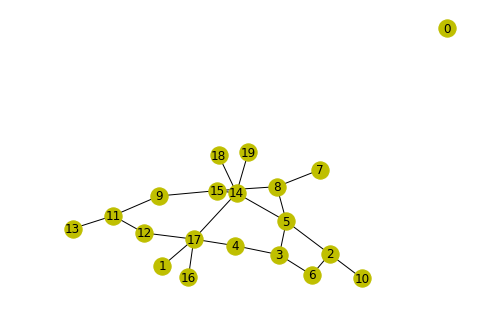

In [226]:
nx.draw(SU, node_color='y', with_labels=True)

size_SU = len(SU.nodes())

In [236]:
## Zentralitätsmaße 
# Akteursbezogen
SU_degree = standarized_degree_list(SU)
SU_closeness = standardized_closeness(SU, size_SU)
SU_betweenness = standardized_betweeness(SU, size_SU)

#print("Prestige Degree:", prestige_degree(SU, size_SU))
#print("Nachbarschafts Prestige:", nachbarschaft(SU))

# Gruppenbezogen
print("Gruppen Degree:", group_degree(SU, size_SU))
print("Gruppen Closeness:", group_closeness(SU, size_SU))
print("Gruppen Betweenness:", group_betweenness(SU, size_SU))

Gruppen Degree: 0.16374
Gruppen Closeness: 0.35789
Gruppen Betweenness: 0.00183


In [237]:
SU_df = pd.DataFrame({'Degree': SU_degree,
                              'Closeness': SU_closeness,
                              'Betweenness': SU_betweenness})

SU_df
#SU_df.sort_values(by=['Degree']) # 17, 14 (gefolgt von 5)
#SU_df.sort_values(by=['Closeness']) # 14 (gefolgt von 17, 5)
#SU_df.sort_values(by=['Betweenness']) # 14 (gefolgt von 17, 5)

,Betweenness,Closeness,Degree
0,0.00000,0.00000,0.00000
1,0.00000,0.33326,0.05263
2,0.00072,0.35188,0.15789
3,0.00055,0.39577,0.15789
4,0.00041,0.39577,0.10526
5,0.00173,0.46341,0.21053
6,0.00007,0.31141,0.10526
7,0.00000,0.29222,0.05263
8,0.00082,0.39577,0.15789
9,0.00048,0.34542,0.10526


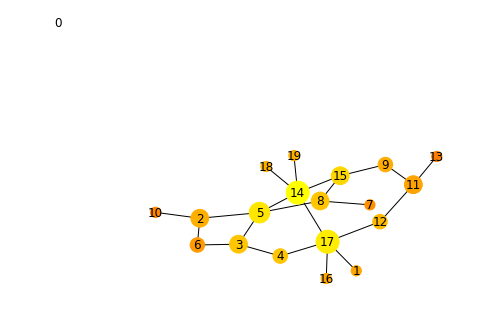

In [238]:
pos = nx.spring_layout(SU)

nx.draw(SU, pos, with_labels=True, node_size=SU_df['Degree'].loc[SU] * 2000,
       node_color=SU_df['Closeness'].loc[SU],
       cmap=plt.cm.autumn)

size_SU = len(SU.nodes())

In [239]:
# Wir löschen nun einen als zentral identifizierten Knoten: Akteur 14
# These: durch die Löschung wird die Betweeness der um die herum liegenden Knoten höher
SU_adj = SU

In [240]:
SU_adj.remove_node(14)

size_SU_adj = len(SU_adj.nodes())

In [241]:
## Zentralitätsmaße 
# Akteursbezogen
SU_adj_degree = standarized_degree_list(SU_adj)
SU_adj_closeness = standardized_closeness(SU_adj, size_SU_adj)
SU_adj_betweenness = standardized_betweeness(SU_adj, size_SU_adj)

#print("Prestige Degree:", prestige_degree(SU, size_SU))
#print("Nachbarschafts Prestige:", nachbarschaft(SU))

# Gruppenbezogen
print("Gruppen Degree:", group_degree(SU_adj, size_SU_adj))
print("Gruppen Closeness:", group_closeness(SU_adj, size_SU_adj))
print("Gruppen Betweenness:", group_betweenness(SU_adj, size_SU_adj))

Gruppen Degree: 0.13725
Gruppen Closeness: 0.29283
Gruppen Betweenness: 0.00116


In [245]:
SU_adj_df = pd.DataFrame({'Degree': SU_adj_degree,
                              'Closeness': SU_adj_closeness,
                              'Betweenness': SU_adj_betweenness})
SU_adj_df
#SU_adj_df.sort_values(by=['Degree']) # 17 (gefolgt von 2,11)
#SU_adj_df.sort_values(by=['Closeness']) # 5 (gefolgt von 3, 4)
#SU_adj_df.sort_values(by=['Betweenness']) # 17 gefolgt von (5, 3)

# 19, 18 sind jetzt 0 da sie nicht mehr verbunden sind. 15 auch hoch, aber im vergleich zu vorher
# haben sich 17 und 5 "erhoben"

,Betweenness,Closeness,Degree
0,0.00000,0.00000,0.00000
1,0.00000,0.32148,0.05556
2,0.00070,0.36000,0.16667
3,0.00143,0.45000,0.16667
4,0.00128,0.43902,0.11111
5,0.00150,0.45000,0.16667
6,0.00026,0.36000,0.11111
7,0.00000,0.31572,0.05556
8,0.00132,0.41868,0.16667
9,0.00077,0.38304,0.11111


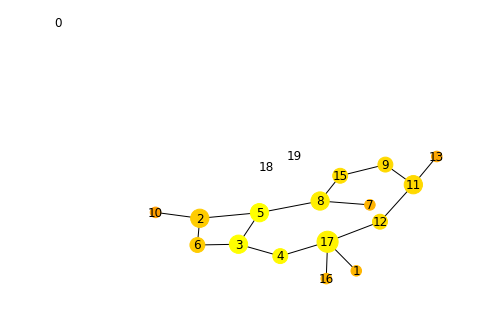

In [243]:
nx.draw(SU_adj, pos, with_labels=True, node_size=SU_adj_df['Degree'].loc[SU_adj] * 2000,
       node_color=SU_adj_df['Closeness'].loc[SU_adj],
       cmap=plt.cm.autumn)

## Gerichtet

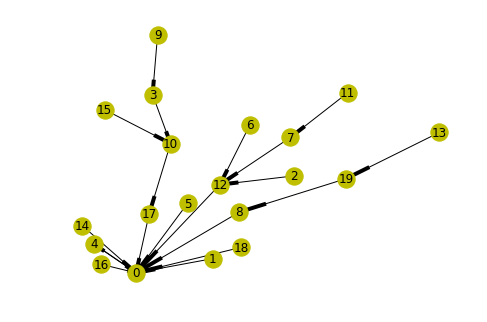

In [50]:
# Zufälliger Graph
SD = nx.random_k_out_graph(20, 1, alpha = 0.4, self_loops=False, seed=None)

nx.draw(SD, node_color='y', with_labels=True)
size_SD = len(SD.nodes())

In [152]:
## Zentralitätsmaße 
# Akteursbezogen
prest_degree = prestige_degree(SD, size_SD)
prest_nachbar = nachbarschaft(SD, size_SD)
di_degree = degree_digraph(SD, size_SD)

# Standartisierte Closeness C*_C
V = len(SD.nodes())
adj = [[] for i in range(V + 1)]
visited = [0 for i in range(V + 1)]
addEdge(SD.edges())
arr = list(SD.nodes())
n = len(arr)
J = findReachableNodes(arr, n)

std_close_di = dict()
for i in SD.nodes():
    di = nx.single_source_shortest_path_length(SD, i)
    sum_di = sum(di.values())
    j = list(J.values())
    j_i = len(j[i])
    if ((sum_di)/j_i) != 0:
        std_c = round(((j_i/(size_SD-1))/((sum_di)/j_i)),4)
    else:
        std_c = 0
    std_close_di.update({i:std_c})

di_closeness = std_close_di

# Gruppenbezogen
print("Gruppendegree gerichteter Graph:", group_degree_digraph(SD, size_SD)) 
print("Gruppen Nachbarschafts Prestige:", group_nachbarschaft(SD, size_SD))

Gruppendegree gerichteter Graph: 0.0
Gruppen Nachbarschafts Prestige: 0.05263050000000001


In [68]:
SD_df = pd.DataFrame({'Prestige_D': prest_degree,
                      'Di_D': di_degree,
                      'Prestige_Nachbar': prest_nachbar,
                      'Di_C': di_closeness})
SD_df
#SD_df.sort_values(by=['Prestige_Nachbar']) # 3,5
#SD_df.sort_values(by=['Prestige_D']) # 3,5
#SD_df.sort_values(by=['Di_D']) # Alle haben gleichen Wert
#SD_df.sort_values(by=['Di_C']) # 0 (gefolgt von 14,5,8)

,Di_C,Di_D,Prestige_D,Prestige_Nachbar
0,0.2105,0.05263,0.47368,0.47368
1,0.0175,0.05263,0.00000,0.00000
2,0.0351,0.05263,0.00000,0.00000
3,0.0474,0.05263,0.05263,0.05263
4,0.4737,0.05263,0.05263,0.05263
5,0.0175,0.05263,0.00000,0.00000
6,0.0088,0.05263,0.00000,0.00000
7,0.0088,0.05263,0.05263,0.05263
8,0.0175,0.05263,0.05263,0.05263
9,0.0035,0.05263,0.00000,0.00000


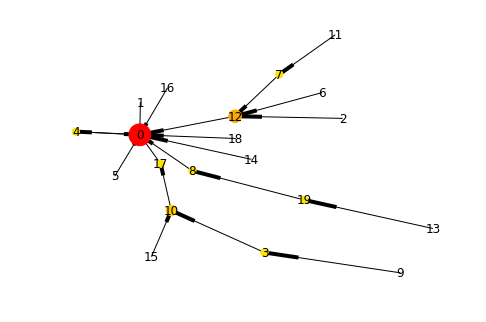

In [53]:
pos = nx.spring_layout(SD)
nx.draw(SD, pos, with_labels=True, node_size=SD_df['Prestige_D'].loc[SD] * 1000,
       node_color=SD_df['Prestige_Nachbar'].loc[SD],
       cmap=plt.cm.autumn_r)

## Wie wahrscheinlich wählt ein Akteur einen zentralen Akteur für mehrere Relationen?
### Generieung Netzwerk
    

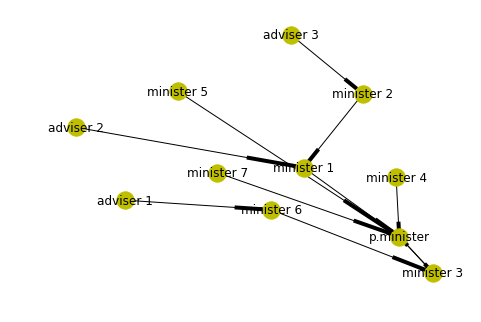

In [67]:
rel1 = nx.read_pajek('AskCal.net')
nx.draw(rel1, node_color='y', with_labels=True)

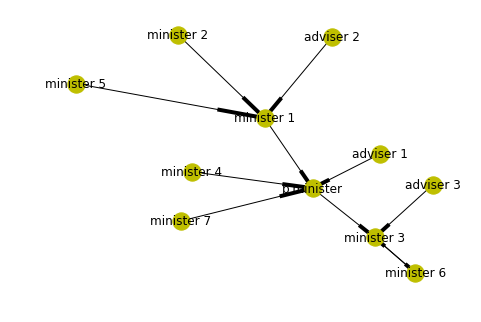

In [63]:
rel12 = nx.read_pajek('AskCog.net')
nx.draw(rel12, node_color='y', with_labels=True)

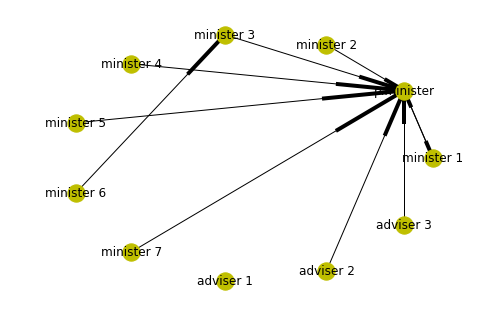

In [57]:
rel2 = nx.read_pajek('AnsCalT.net')
nx.draw_circular(rel2, node_color='y', with_labels=True)

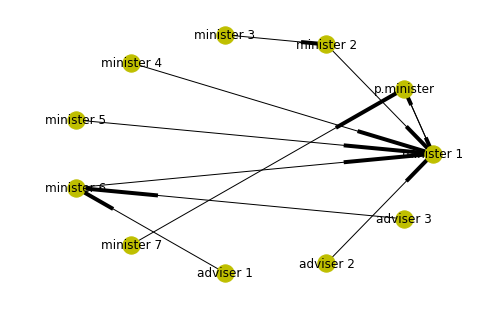

In [59]:
rel22 = nx.read_pajek('AnsCogT.net')
nx.draw_circular(rel22, node_color='y', with_labels=True)

In [35]:
## Anpassungen Relationen 
mapping = {'minister 1': 0, 'p.minister': 1, 'minister 2': 2, 'minister 3':3, 'minister 4':4, 'minister 5':5, 
           'minister 6':6, 'minister 7':7, 'adviser 1':8, 'adviser 2':9, 'adviser 3':10}
rel1 = nx.relabel_nodes(rel1, mapping)
rel2 = nx.relabel_nodes(rel2, mapping)

rel12 = nx.relabel_nodes(rel12, mapping)
rel22 = nx.relabel_nodes(rel22, mapping)

### Betrachtung Recall Fragen

In [36]:
## Zentralitätsmaße Relation 1
# Akteursbezogen
prest_degree_rel1 = prestige_degree(rel1, len(rel1.nodes()))
prest_nachbar_rel1 = nachbarschaft(rel1, len(rel1.nodes()))
di_degree_rel1 = degree_digraph(rel1, len(rel1.nodes()))

# Standartisierte Closeness C*_C 
# Standartisierte Closeness C*_C
V = len(rel1.nodes())
adj = [[] for i in range(V + 1)]
visited = [0 for i in range(V + 1)]
addEdge(rel1.edges())
arr = list(rel1.nodes())
n = len(arr)
J = findReachableNodes(arr, n)

std_close_di = dict()
for i in rel1.nodes():
    di = nx.single_source_shortest_path_length(rel1, i)
    sum_di = sum(di.values())
    j = list(J.values())
    j_i = len(j[i])
    if((sum_di)/j_i) != 0:
        std_c = round(((j_i/(len(rel1.nodes())-1))/((sum_di)/j_i)),4)
    else:
        std_c = 0
    std_close_di.update({i:std_c})

di_closeness_rel1 = std_close_di

# Gruppenbezogen
print("Gruppendegree gerichteter Graph:", group_degree_digraph(rel1, len(rel1.nodes())))
print("Gruppen Nachbarschafts Prestige:", group_nachbarschaft(rel1, len(rel1.nodes())))

Gruppendegree gerichteter Graph: 0.0
Gruppen Nachbarschafts Prestige: 0.10000000000000002


In [37]:
rel1_df = pd.DataFrame({'Prestige_D': prest_degree_rel1,
                      'Di_D': di_degree_rel1,
                      'Prestige_Nachbar': prest_nachbar_rel1,
                      'Di_C': di_closeness_rel1})

rel1_df
# 1 und damit der p.minister ist der zentralste Knoten

,Di_C,Di_D,Prestige_D,Prestige_Nachbar
0,0.3000,0.1,0.2,0.2
1,0.9000,0.1,0.5,0.5
2,0.0167,0.1,0.1,0.1
3,0.1000,0.1,0.2,0.2
4,0.0333,0.1,0.0,0.0
5,0.0333,0.1,0.0,0.0
6,0.0333,0.1,0.1,0.1
7,0.0333,0.1,0.0,0.0
8,0.0167,0.1,0.0,0.0
9,0.0167,0.1,0.0,0.0


In [38]:
rel1.edges() # 0, 3, 4, 5, 7 haben p minister angegeben

OutMultiEdgeDataView([(0, 1), (1, 3), (2, 0), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 6), (9, 0), (10, 2)])

In [39]:
## Zentralitätsmaße Relation 2
# Akteursbezogen
prest_degree_rel2 = prestige_degree(rel2, len(rel2.nodes()))
prest_nachbar_rel2 = nachbarschaft(rel2, len(rel2.nodes()))
di_degree_rel2 = degree_digraph(rel2, len(rel2.nodes()))

# Standartisierte Closeness C*_C 
# Standartisierte Closeness C*_C
V = len(rel2.nodes())
adj = [[] for i in range(V + 1)]
visited = [0 for i in range(V + 1)]
addEdge(rel2.edges())
arr = list(rel2.nodes())
n = len(arr)
J = findReachableNodes(arr, n)

std_close_di = dict()
for i in rel2.nodes():
    di = nx.single_source_shortest_path_length(rel2, i)
    sum_di = sum(di.values())
    j = list(J.values())
    j_i = len(j[i])
    if ((sum_di)/j_i) != 0:
        std_c = round(((j_i/(len(rel2.nodes())-1))/((sum_di)/j_i)),4)
    else:
        std_c = 0
    std_close_di.update({i:std_c})

di_closeness_rel2 = std_close_di

# Gruppenbezogen
print("Gruppendegree gerichteter Graph:", group_degree_digraph(rel2, len(rel2.nodes())))
print("Gruppen Nachbarschafts Prestige:", group_nachbarschaft(rel2, len(rel2.nodes())))

Gruppendegree gerichteter Graph: 0.001
Gruppen Nachbarschafts Prestige: 0.09090909090909093


In [40]:
rel2_df = pd.DataFrame({'Prestige_D': prest_degree_rel2,
                      'Di_D': di_degree_rel2,
                      'Prestige_Nachbar': prest_nachbar_rel2,
                      'Di_C': di_closeness_rel2})

rel2_df
# Auch hier wieder 1 führend (0 und 3 folgend)

,Di_C,Di_D,Prestige_D,Prestige_Nachbar
0,0.4000,0.1,0.1,0.1
1,0.4000,0.1,0.8,0.8
2,0.0333,0.1,0.0,0.0
3,0.0333,0.1,0.1,0.1
4,0.0333,0.1,0.0,0.0
5,0.0333,0.1,0.0,0.0
6,0.0167,0.1,0.0,0.0
7,0.0333,0.1,0.0,0.0
8,0.0000,0.0,0.0,0.0
9,0.0333,0.1,0.0,0.0


In [41]:
rel2.edges()

OutMultiEdgeDataView([(0, 1), (1, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (9, 1), (10, 1)])

In [42]:
# Wie häufig haben die Akteure den Prime Minister nominiert? (Maximun 4 mal)
def choice_actor_i(i):
    choosen_2 = dict()
    for node in rel2.nodes():
        if node != i:
            true_edge = (node, i)
            edge_rel1 = list(rel1.edges(node))
            edge_rel2 = list(rel2.edges(node))
            edge_rel12 = list(rel12.edges(node))
            edge_rel22 = list(rel22.edges(node))
            total_list = edge_rel1 + edge_rel12 + edge_rel2 + edge_rel22
            count = total_list.count(true_edge)
            choosen_2.update({node : count})
    return(choosen_2)

print(choice_actor_i(1))

{0: 4, 2: 1, 3: 2, 4: 3, 5: 2, 6: 0, 7: 4, 8: 1, 9: 1, 10: 1}


In [43]:
# Wkteit Prime Minister zu nominieren
choosen_2 = choice_actor_i(1)
probabilty_choose1 = dict()
for node, item in choosen_2.items():
    prob = item/4
    probabilty_choose1.update({node:prob})
    
print(probabilty_choose1)

group_prop = round((sum(probabilty_choose1.values())/11), 4)
print(group_prop)

{0: 1.0, 2: 0.25, 3: 0.5, 4: 0.75, 5: 0.5, 6: 0.0, 7: 1.0, 8: 0.25, 9: 0.25, 10: 0.25}
0.4318


In [44]:
# Wkteit Minister zu nominieren
choosen_2 = choice_actor_i(0)
probabilty_choose1 = dict()
for node, item in choosen_2.items():
    prob = item/4
    probabilty_choose1.update({node:prob})
    
print(probabilty_choose1)

group_prop = round((sum(probabilty_choose1.values())/11), 4)
print(group_prop)

{1: 0.5, 2: 0.75, 3: 0.0, 4: 0.25, 5: 0.5, 6: 0.25, 7: 0.0, 8: 0.0, 9: 0.75, 10: 0.0}
0.2727


In [45]:
# Wkteit Minister 3 zu nominieren
choosen_2 = choice_actor_i(3)
probabilty_choose1 = dict()
for node, item in choosen_2.items():
    prob = item/4
    probabilty_choose1.update({node:prob})
    
print(probabilty_choose1)

group_prop = round((sum(probabilty_choose1.values())/11), 4)
print(group_prop)

{0: 0.0, 1: 0.5, 2: 0.0, 4: 0.0, 5: 0.0, 6: 0.75, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.25}
0.1364


### Betrachtung Recognition Fragen

In [46]:
## Zentralitätsmaße Relation 12
# Akteursbezogen
prest_degree_rel12 = prestige_degree(rel12, len(rel12.nodes()))
prest_nachbar_rel12 = nachbarschaft(rel12, len(rel12.nodes()))
di_degree_rel12 = degree_digraph(rel12, len(rel12.nodes()))

# Standartisierte Closeness C*_C
V = len(rel12.nodes())
adj = [[] for i in range(V + 1)]
visited = [0 for i in range(V + 1)]
addEdge(rel12.edges())
arr = list(rel12.nodes())
n = len(arr)
J = findReachableNodes(arr, n)

std_close_di = dict()
for i in rel12.nodes():
    di = nx.single_source_shortest_path_length(rel12, i)
    sum_di = sum(di.values())
    j = list(J.values())
    j_i = len(j[i])
    if ((sum_di)/j_i) != 0:
        std_c = round(((j_i/(len(rel12.nodes())-1))/((sum_di)/j_i)),4)
    else:
        std_c = 0
    std_close_di.update({i:std_c})

di_closeness_rel12 = std_close_di

# Gruppenbezogen
print("Gruppendegree gerichteter Graph:", group_degree_digraph(rel12, len(rel12.nodes())))
print("Gruppen Nachbarschafts Prestige:", group_nachbarschaft(rel12, len(rel12.nodes())))

Gruppendegree gerichteter Graph: 0.0
Gruppen Nachbarschafts Prestige: 0.1


In [47]:
rel12_df = pd.DataFrame({'Prestige_D': prest_degree_rel12,
                      'Di_D': di_degree_rel12,
                      'Prestige_Nachbar': prest_nachbar_rel12,
                      'Di_C': di_closeness_rel12})

rel12_df
# 1 und damit der p.minister ist der zentralste Knoten

,Di_C,Di_D,Prestige_D,Prestige_Nachbar
0,0.2667,0.1,0.3,0.3
1,0.5333,0.1,0.4,0.4
2,0.0100,0.1,0.0,0.0
3,0.1000,0.1,0.3,0.3
4,0.0167,0.1,0.0,0.0
5,0.0100,0.1,0.0,0.0
6,0.1000,0.1,0.1,0.1
7,0.0167,0.1,0.0,0.0
8,0.0167,0.1,0.0,0.0
9,0.0100,0.1,0.0,0.0


In [48]:
## Zentralitätsmaße Relation 22
# Akteursbezogen
prest_degree_rel22 = prestige_degree(rel22, len(rel22.nodes()))
prest_nachbar_rel22 = nachbarschaft(rel22, len(rel22.nodes()))
di_degree_rel22 = degree_digraph(rel22, len(rel22.nodes()))

# Standartisierte Closeness C*_C 
# Standartisierte Closeness C*_C
V = len(rel22.nodes())
adj = [[] for i in range(V + 1)]
visited = [0 for i in range(V + 1)]
addEdge(rel22.edges())
arr = list(rel22.nodes())
n = len(arr)
J = findReachableNodes(arr, n)

std_close_di = dict()
for i in rel22.nodes():
    di = nx.single_source_shortest_path_length(rel1, i)
    sum_di = sum(di.values())
    j = list(J.values())
    j_i = len(j[i])
    if ((sum_di)/j_i) != 0:
        std_c = round(((j_i/(len(rel22.nodes())-1))/((sum_di)/j_i)),4)
    else:
        std_c = 0
    std_close_di.update({i:std_c})

di_closeness_rel22 = std_close_di

# Gruppenbezogen
print("Gruppendegree gerichteter Graph:", group_degree_digraph(rel22, len(rel22.nodes())))
print("Gruppen Nachbarschafts Prestige:", group_nachbarschaft(rel22, len(rel22.nodes())))

Gruppendegree gerichteter Graph: 0.0
Gruppen Nachbarschafts Prestige: 0.1


In [49]:
rel22_df = pd.DataFrame({'Prestige_D': prest_degree_rel22,
                      'Di_D': di_degree_rel22,
                      'Prestige_Nachbar': prest_nachbar_rel22,
                      'Di_C': di_closeness_rel22})

rel22_df
# Prestige hat am meisten der Minister, Zentralität der Prime Minister

,Di_C,Di_D,Prestige_D,Prestige_Nachbar
0,0.1333,0.1,0.6,0.6
1,0.4000,0.1,0.2,0.2
2,0.0167,0.1,0.1,0.1
3,0.1000,0.1,0.0,0.0
4,0.0333,0.1,0.0,0.0
5,0.0333,0.1,0.0,0.0
6,0.0333,0.1,0.2,0.2
7,0.0333,0.1,0.0,0.0
8,0.0167,0.1,0.0,0.0
9,0.0167,0.1,0.0,0.0
